<a href="https://colab.research.google.com/github/NitiSivakumarAnavai/NitiSivakumarAnavai/blob/main/DL_exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/train")
batch_size = 32
img_height = 128
img_width = 128

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 294 files belonging to 2 classes.
Using 265 files for training.


In [6]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 294 files belonging to 2 classes.
Using 29 files for validation.


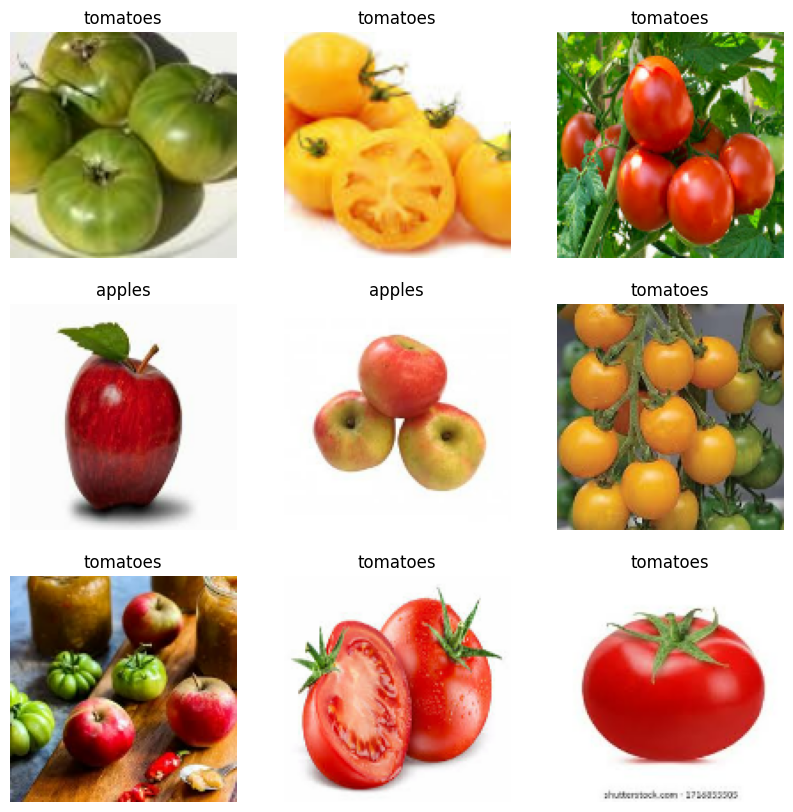

In [7]:
import PIL
import numpy as np
import PIL.Image
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
import os
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling
from keras.models import Sequential

img_height, img_width = 128,128  # You should define these variables as per your input image dimensions
num_classes = 2

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,423,841 (16.88 MB)

 Trainable params: 4,423,841 (16.88 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
epochs = 40
trained_data = model.fit(train_ds,validation_data = valid_ds,epochs = epochs)

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.5413 - loss: 0.7000 - val_accuracy: 0.6552 - val_loss: 0.6799
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 895ms/step - accuracy: 0.6138 - loss: 0.6693 - val_accuracy: 0.3448 - val_loss: 0.7072
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step - accuracy: 0.6341 - loss: 0.6531 - val_accuracy: 0.7241 - val_loss: 0.6297
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 598ms/step - accuracy: 0.5646 - loss: 0.6879 - val_accuracy: 0.6207 - val_loss: 0.6550
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 645ms/step - accuracy: 0.6903 - loss: 0.5787 - val_accuracy: 0.5862 - val_loss: 0.6887
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 0.7121 - loss: 0.5440 - val_accuracy: 0.6897 - val_loss: 0.7468
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 0.7256 - loss: 0.5519 - val_accuracy: 0.6552 - val_loss: 0.6609
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 830ms/step - accuracy: 0.7178 - loss: 0.5636 - val_accuracy: 0.6897 - val_los

In [24]:
accuracy = trained_data.tarined_data['accuracy']
val_acc = trained_data.trained_data['val_accuracy']

loss = ['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()